# The Spark Foundation - GRIP - Data Science and Business Analytics

## Task 2 : Prediction Using Unsupervised ML

## Author : Pratiyush Raj

### From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.shape

(150, 6)

### Now it's time to find the optimum number of clusters gor K-Means Classification

In [10]:
x= df.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans

# within cluster sum of squares

wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init=10, random_state=0)
    
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)


C:\Users\hp\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Plot line graph for the above result and observe the line and identify the point where cluster elbow occurs

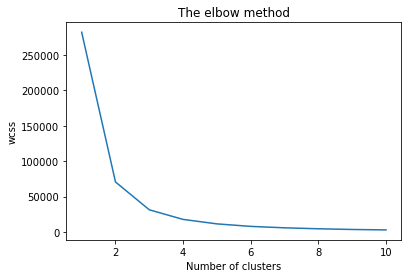

In [11]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

### The optimum number of cluster is 3

## Applying Kmeans to the dataset with the optimum number of cluster

In [12]:
k_means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_kmeans = k_means.fit_predict(x)

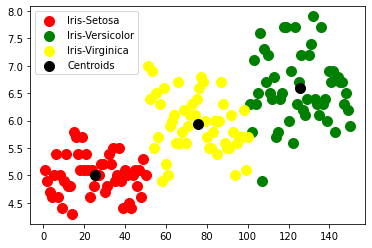

In [15]:
plt.scatter(x[pred_kmeans == 0,0], x[pred_kmeans == 0,1], s=100, c='red', label= 'Iris-Setosa')
plt.scatter(x[pred_kmeans == 1,0], x[pred_kmeans == 1,1], s=100, c='green', label= 'Iris-Versicolor')
plt.scatter(x[pred_kmeans == 2,0], x[pred_kmeans == 2,1], s=100, c='yellow', label= 'Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s=100, c='black', label= 'Centroids')
plt.legend()

### From the above plot it is clear that there are 3 clusters and each has centroids that are represented with black color.

## Thank You